In [1]:
import pandas as pd
import numpy as np

In [2]:
dftest=pd.read_csv("/content/test_lAUu6dG.csv")
dftest
dftrain=pd.read_csv("/content/train_ctrUa4K.csv")
dftrain

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


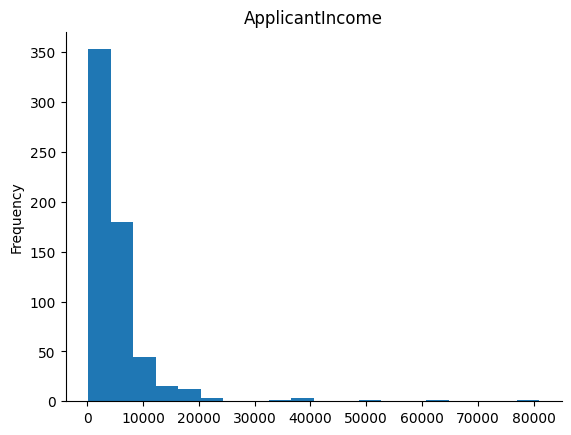

In [3]:
# @title ApplicantIncome

from matplotlib import pyplot as plt
dftrain['ApplicantIncome'].plot(kind='hist', bins=20, title='ApplicantIncome')
plt.gca().spines[['top', 'right',]].set_visible(False)

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       367.000000         36

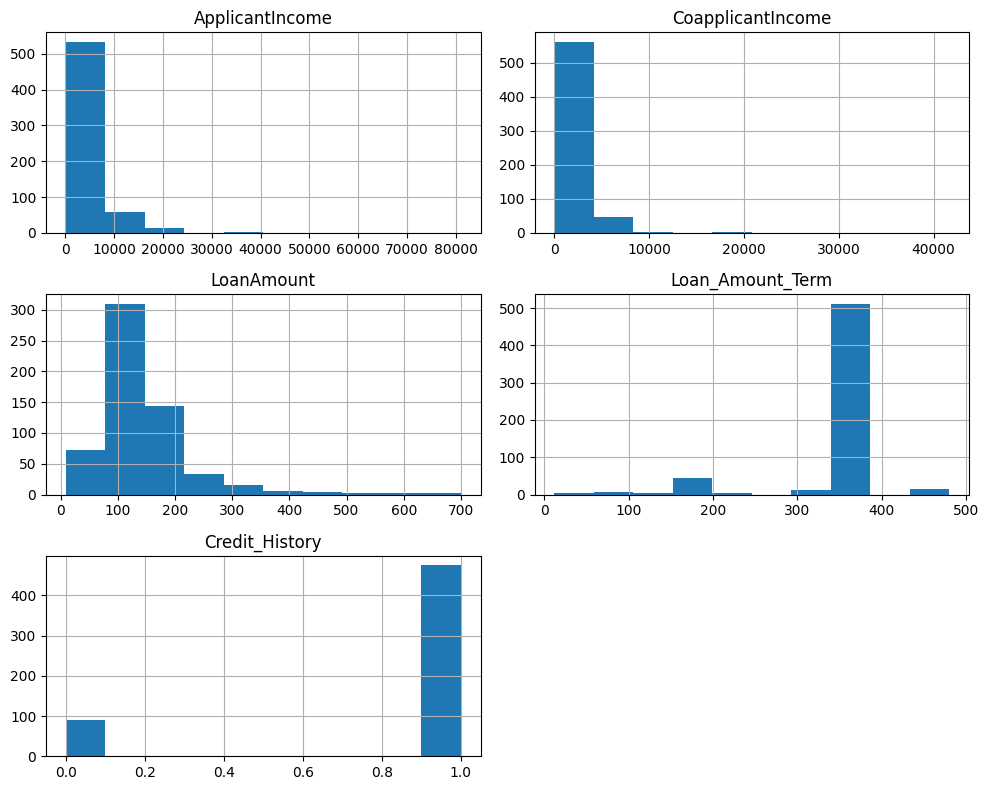

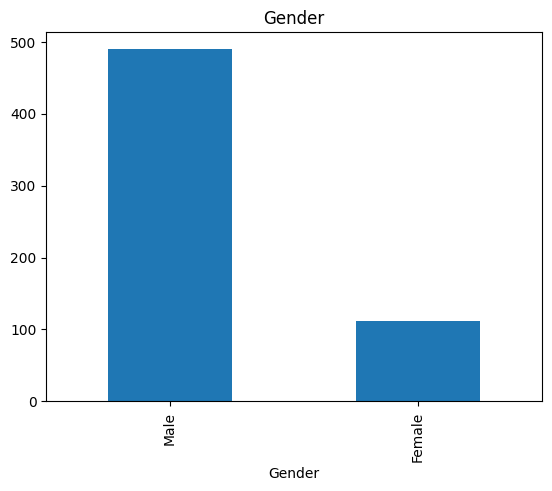

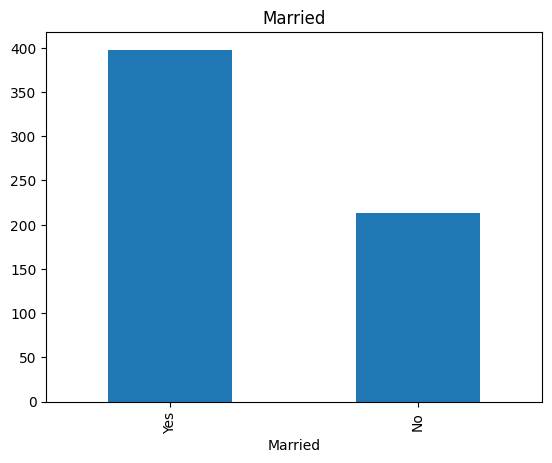

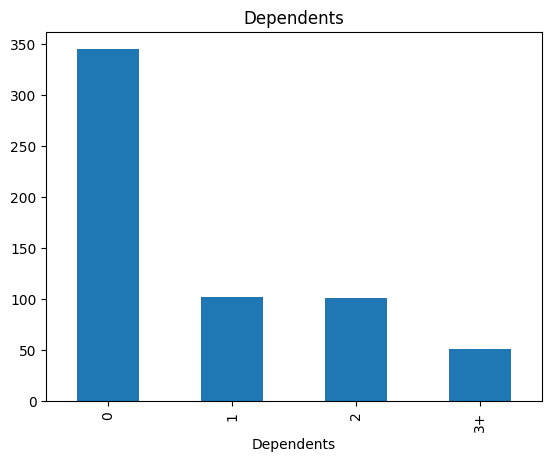

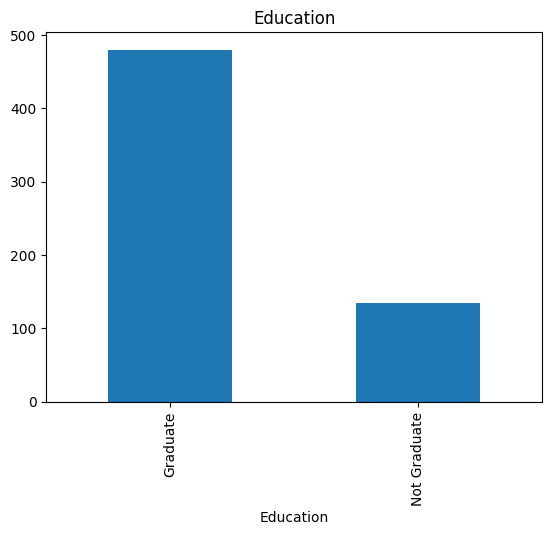

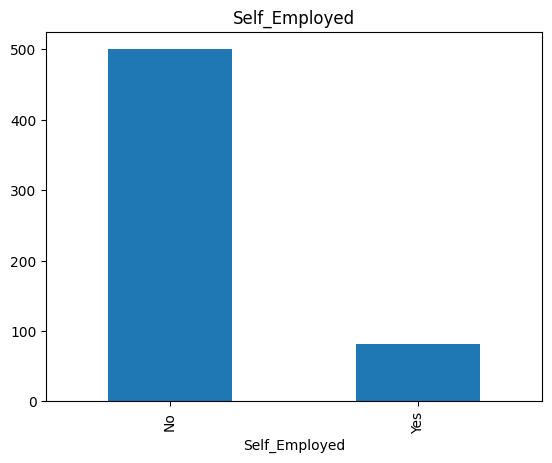

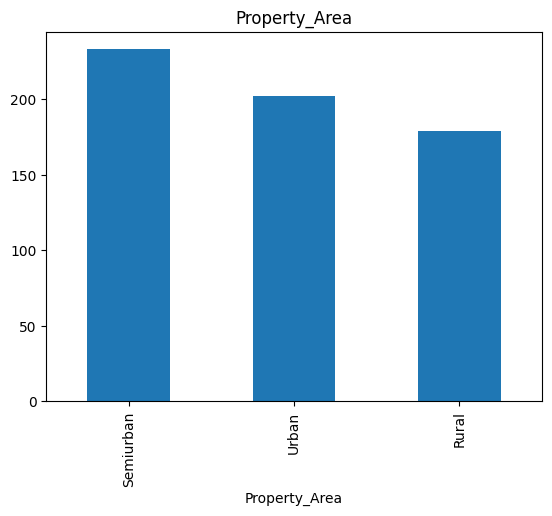

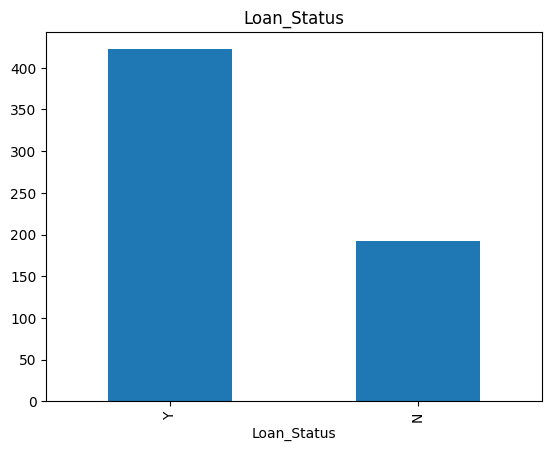

In [4]:
# prompt: perform the Explorative data Analysis

# Summary statistics for numerical features
print(dftrain.describe())
print(dftest.describe())

# Information about the dataframes
print(dftrain.info())
print(dftest.info())

# Check for missing values
print(dftrain.isnull().sum())
print(dftest.isnull().sum())

# Visualize distributions of numerical features in train set
dftrain.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Visualize distributions of categorical features in train set
for col in dftrain.select_dtypes(include='object').columns:
    if col != 'Loan_ID':
        dftrain[col].value_counts().plot(kind='bar', title=col)
        plt.show()



In [5]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [6]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
dftest.shape,dftrain.shape

((367, 12), (614, 13))

In [8]:
dftest.isnull().sum(),dftrain.isnull().sum()

(Loan_ID               0
 Gender               11
 Married               0
 Dependents           10
 Education             0
 Self_Employed        23
 ApplicantIncome       0
 CoapplicantIncome     0
 LoanAmount            5
 Loan_Amount_Term      6
 Credit_History       29
 Property_Area         0
 dtype: int64,
 Loan_ID               0
 Gender               13
 Married               3
 Dependents           15
 Education             0
 Self_Employed        32
 ApplicantIncome       0
 CoapplicantIncome     0
 LoanAmount           22
 Loan_Amount_Term     14
 Credit_History       50
 Property_Area         0
 Loan_Status           0
 dtype: int64)

In [9]:
#  extract the table where the gender column is null

dftest[dftest["Gender"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
22,LP001128,NaN,No,0,Graduate,No,3909,0,101.0,360.0,1.0,Urban
51,LP001287,NaN,Yes,3+,Not Graduate,No,3500,833,120.0,360.0,1.0,Semiurban
106,LP001563,NaN,No,0,Graduate,No,1596,1760,119.0,360.0,0.0,Urban
138,LP001769,NaN,No,NaN,Graduate,No,3333,1250,110.0,360.0,1.0,Semiurban
209,LP002165,NaN,No,1,Not Graduate,No,2038,4027,100.0,360.0,1.0,Rural
231,LP002298,NaN,No,0,Graduate,Yes,2860,2988,138.0,360.0,1.0,Urban
245,LP002355,NaN,Yes,0,Graduate,No,3186,3145,150.0,180.0,0.0,Semiurban
279,LP002553,NaN,No,0,Graduate,No,29167,0,185.0,360.0,1.0,Semiurban
296,LP002614,NaN,No,0,Graduate,No,6478,0,108.0,360.0,1.0,Semiurban
303,LP002657,NaN,Yes,1,Not Graduate,Yes,570,2125,68.0,360.0,1.0,Rural


In [10]:
# data imputation

dftest['Gender'].fillna(dftest['Gender'].mode()[0], inplace=True)

dftest['Gender'].fillna(dftest['Gender'].mode()[0], inplace=True)


print(dftest.isnull().sum())


print(dftest[dftest["Gender"].isnull()])
#---------------------------------------------------------------------------------------------------------------------

# data imputation on training data

dftrain['Gender'].fillna(dftrain['Gender'].mode()[0], inplace=True)

dftrain['Gender'].fillna(dftrain['Gender'].mode()[0], inplace=True)



print(dftrain.isnull().sum())


print(dftrain[dftrain["Gender"].isnull()])


Loan_ID               0
Gender                0
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64
Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area]
Index: []
Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Prope

<ipython-input-10-025f71280d99>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dftest['Gender'].fillna(dftest['Gender'].mode()[0], inplace=True)
<ipython-input-10-025f71280d99>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [11]:
# extract the table where the dependents column is null
dftest[dftest["Dependents"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
46,LP001237,Male,Yes,NaN,Not Graduate,No,4163,1475,162.0,360.0,1.0,Urban
70,LP001366,Female,No,NaN,Graduate,No,3250,0,95.0,360.0,1.0,Semiurban
111,LP001587,Male,Yes,NaN,Graduate,No,4082,0,93.0,360.0,1.0,Semiurban
138,LP001769,Male,No,NaN,Graduate,No,3333,1250,110.0,360.0,1.0,Semiurban
202,LP002111,Male,Yes,NaN,Graduate,No,3016,1300,100.0,360.0,NaN,Urban
247,LP002360,Male,Yes,NaN,Graduate,No,10000,0,NaN,360.0,1.0,Urban
251,LP002385,Male,Yes,NaN,Graduate,No,3863,0,70.0,300.0,1.0,Semiurban
265,LP002441,Male,No,NaN,Graduate,No,3579,3308,138.0,360.0,NaN,Semiurban
302,LP002654,Female,No,NaN,Graduate,Yes,14987,0,177.0,360.0,1.0,Rural
312,LP002754,Male,No,NaN,Graduate,No,2066,2108,104.0,84.0,1.0,Urban


In [12]:
dftest["Dependents"].value_counts()

,count
Dependents,
0,200
2,59
1,58
3+,40


In [13]:

print(dftest["Dependents"].value_counts())



# Fill missing 'Dependents' where 'Married' is 'No' with '0'
dftest.loc[(dftest['Dependents'].isnull()) & (dftest['Married'] == 'No'), 'Dependents'] = '0'


dftest.loc[(dftest['Dependents'].isnull()) & (dftest['Married'] == 'Yes'), 'Dependents'] = '1'

# Verify that there are no more missing values in the 'Dependents' column
print(dftest.isnull().sum())

# Display the updated rows where Dependents was previously null to confirm the imputation
print(dftest[dftest["Dependents"].isnull()])

#========================================================================================================================


print(dftrain["Dependents"].value_counts())



# Fill missing 'Dependents' where 'Married' is 'No' with '0'
dftrain.loc[(dftrain['Dependents'].isnull()) & (dftrain['Married'] == 'No'), 'Dependents'] = '0'


dftrain.loc[(dftrain['Dependents'].isnull()) & (dftrain['Married'] == 'Yes'), 'Dependents'] = '1'

# Verify that there are no more missing values in the 'Dependents' column
print(dftrain.isnull().sum())


Dependents
0     200
2      59
1      58
3+     40
Name: count, dtype: int64
Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64
Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area]
Index: []
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Loan_ID               0
Gender                0
Married               3
Dependents            3
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [14]:
dftest[dftest['Self_Employed'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
11,LP001082,Male,Yes,1,Graduate,NaN,2185,1516,162.0,360.0,1.0,Semiurban
13,LP001094,Male,Yes,2,Graduate,NaN,12173,0,166.0,360.0,0.0,Semiurban
36,LP001208,Male,Yes,2,Graduate,NaN,7350,4029,185.0,180.0,1.0,Urban
72,LP001375,Male,Yes,1,Graduate,NaN,4083,1775,139.0,60.0,1.0,Urban
89,LP001472,Female,No,0,Graduate,NaN,5058,0,200.0,360.0,1.0,Rural
142,LP001789,Male,Yes,3+,Not Graduate,NaN,6794,528,139.0,360.0,0.0,Urban
161,LP001906,Male,No,0,Graduate,NaN,2964,0,84.0,360.0,0.0,Semiurban
168,LP001950,Female,Yes,3+,Graduate,NaN,1750,2935,94.0,360.0,0.0,Semiurban
175,LP001999,Male,Yes,2,Graduate,NaN,4912,4614,160.0,360.0,1.0,Rural


In [15]:

# For missing 'Self_Employed', if 'Education' is 'Graduate', fill with 'Yes', otherwise 'No'.

dftest.loc[(dftest['Self_Employed'].isnull()) & (dftest['Education'] == 'Graduate'), 'Self_Employed'] = 'Yes'
dftest.loc[(dftest['Self_Employed'].isnull()) & (dftest['Education'] != 'Graduate'), 'Self_Employed'] = 'No'

# Verify that there are no more missing values in the 'Self_Employed' column
print(dftest.isnull().sum())

# Display the updated rows where Self_Employed was previously null to confirm the imputation
print(dftest[dftest['Self_Employed'].isnull()])

#=========================================================================================================================

# For missing 'Self_Employed', if 'Education' is 'Graduate', fill with 'Yes', otherwise 'No'.

dftrain.loc[(dftrain['Self_Employed'].isnull()) & (dftrain['Education'] == 'Graduate'), 'Self_Employed'] = 'Yes'
dftrain.loc[(dftrain['Self_Employed'].isnull()) & (dftrain['Education'] != 'Graduate'), 'Self_Employed'] = 'No'

# Verify that there are no more missing values in the 'Self_Employed' column
print(dftrain.isnull().sum())

# Display the updated rows where Self_Employed was previously null to confirm the imputation
print(dftrain[dftrain['Self_Employed'].isnull()])

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64
Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area]
Index: []
Loan_ID               0
Gender                0
Married               3
Dependents            3
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Prope

In [16]:
dftest[dftest['LoanAmount'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
78,LP001415,Male,Yes,1,Graduate,No,3413,4053,NaN,360.0,1.0,Semiurban
101,LP001542,Female,Yes,0,Graduate,No,2262,0,NaN,480.0,0.0,Semiurban
188,LP002057,Male,Yes,0,Not Graduate,No,13083,0,NaN,360.0,1.0,Rural
247,LP002360,Male,Yes,1,Graduate,No,10000,0,NaN,360.0,1.0,Urban
289,LP002593,Male,Yes,1,Graduate,No,8333,4000,NaN,360.0,1.0,Urban


In [17]:


# Let's check the distribution first.
print(dftest['LoanAmount'].describe())


median_loan_amount = dftest['LoanAmount'].median()
dftest['LoanAmount'].fillna(median_loan_amount, inplace=True)

# Verify that there are no more missing values in the 'LoanAmount' column
print(dftest.isnull().sum())

# Display the updated rows where LoanAmount was previously null to confirm the imputation
print(dftest[dftest['LoanAmount'].isnull()])

#==================================================================================================

print(dftrain['LoanAmount'].describe())


median_loan_amount = dftrain['LoanAmount'].median()
dftrain['LoanAmount'].fillna(median_loan_amount, inplace=True)

# Verify that there are no more missing values in the 'LoanAmount' column
print(dftrain.isnull().sum())

# Display the updated rows where LoanAmount was previously null to confirm the imputation
print(dftrain[dftrain['LoanAmount'].isnull()])

count    362.000000
mean     136.132597
std       61.366652
min       28.000000
25%      100.250000
50%      125.000000
75%      158.000000
max      550.000000
Name: LoanAmount, dtype: float64
Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64
Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area]
Index: []
count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64
Loan_ID               0
Gender                0
Married               3
Dependents            3
Education           

<ipython-input-17-767824fcf097>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dftest['LoanAmount'].fillna(median_loan_amount, inplace=True)
<ipython-input-17-767824fcf097>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [18]:
dftest[dftest['Credit_History'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
12,LP001083,Male,No,3+,Graduate,No,4166,0,40.0,180.0,NaN,Urban
26,LP001163,Male,Yes,2,Graduate,No,4363,1250,140.0,360.0,NaN,Urban
28,LP001174,Male,Yes,0,Graduate,No,3772,833,57.0,360.0,NaN,Semiurban
45,LP001232,Male,Yes,0,Graduate,No,4260,3900,185.0,NaN,NaN,Urban
90,LP001475,Male,Yes,0,Graduate,Yes,3188,2286,130.0,360.0,NaN,Rural
99,LP001527,Male,Yes,3+,Graduate,No,6835,0,188.0,360.0,NaN,Semiurban
104,LP001558,Male,No,0,Graduate,No,2243,2233,107.0,360.0,NaN,Semiurban
115,LP001601,Male,No,3+,Graduate,No,4243,4123,157.0,360.0,NaN,Semiurban
139,LP001771,Female,No,3+,Graduate,No,4083,0,103.0,360.0,NaN,Semiurban


In [19]:

# Credit History is a categorical variable (likely 0 or 1)

print(dftest['Credit_History'].value_counts(dropna=False))

# Since it's a categorical variable, imputing with the mode is a common approach.
mode_credit_history = dftest['Credit_History'].mode()[0]
dftest['Credit_History'].fillna(mode_credit_history, inplace=True)

# Verify that there are no more missing values in the 'Credit_History' column
print(dftest.isnull().sum())

# Display the updated rows where Credit_History was previously null to confirm the imputation
print(dftest[dftest['Credit_History'].isnull()])

#==============================================================================================================

print(dftrain['Credit_History'].value_counts(dropna=False))

# Since it's a categorical variable, imputing with the mode is a common approach.
mode_credit_history = dftrain['Credit_History'].mode()[0]
dftrain['Credit_History'].fillna(mode_credit_history, inplace=True)

# Verify that there are no more missing values in the 'Credit_History' column
print(dftrain.isnull().sum())

# Display the updated rows where Credit_History was previously null to confirm the imputation
print(dftrain[dftrain['Credit_History'].isnull()])


Credit_History
1.0    279
0.0     59
NaN     29
Name: count, dtype: int64
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64
Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area]
Index: []
Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64
Loan_ID               0
Gender                0
Married               3
Dependents            3
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64
Empty DataFrame
Columns: [Loan_ID, Gender

<ipython-input-19-5b30d4a85a16>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dftest['Credit_History'].fillna(mode_credit_history, inplace=True)
<ipython-input-19-5b30d4a85a16>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [20]:


# Define ranges and corresponding terms (these are just examples)
# You might want to adjust these ranges and terms based on domain knowledge or data analysis.
loan_term_mapping = {
    'short': 180.0, # Example for smaller loans
    'medium': 360.0, # Most common term
    'long': 480.0 # Example for larger loans
}

# Fill with the most frequent term first (assuming it's the most likely)
most_frequent_term = dftest['Loan_Amount_Term'].mode()[0]
dftest['Loan_Amount_Term'].fillna(most_frequent_term, inplace=True)


# Verify that there are no more missing values in the 'Loan_Amount_Term' column
print(dftest.isnull().sum())

# Display the updated rows where Loan_Amount_Term was previously null to confirm the imputation
print(dftest[dftest['Loan_Amount_Term'].isnull()])

#==========================================================================================================

loan_term_mapping = {
    'short': 180.0, # Example for smaller loans
    'medium': 360.0, # Most common term
    'long': 480.0 # Example for larger loans
}

# Fill with the most frequent term first (assuming it's the most likely)
most_frequent_term = dftrain['Loan_Amount_Term'].mode()[0]
dftrain['Loan_Amount_Term'].fillna(most_frequent_term, inplace=True)


# Verify that there are no more missing values in the 'Loan_Amount_Term' column
print(dftrain.isnull().sum())

# Display the updated rows where Loan_Amount_Term was previously null to confirm the imputation
print(dftrain[dftrain['Loan_Amount_Term'].isnull()])

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64
Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area]
Index: []
Loan_ID              0
Gender               0
Married              3
Dependents           3
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
In

<ipython-input-20-5b98b9934a03>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dftest['Loan_Amount_Term'].fillna(most_frequent_term, inplace=True)
<ipython-input-20-5b98b9934a03>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [21]:
dftest.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [22]:
dftrain[dftrain['Married'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,128.0,240.0,1.0,Semiurban,Y


In [23]:


# Fill missing values in 'Married' with the mode for dftrain
dftrain['Married'].fillna(dftrain['Married'].mode()[0], inplace=True)

# Verify that there are no more missing values in the specified columns
print(dftrain.isnull().sum())

#======================================================================================


# Fill missing values in 'Married' with the mode for dftrain
dftrain['Dependents'].fillna(dftrain['Dependents'].mode()[0], inplace=True)

# Verify that there are no more missing values in the specified columns
print(dftrain.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           3
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<ipython-input-23-e97f9c0f7f0b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dftrain['Married'].fillna(dftrain['Married'].mode()[0], inplace=True)
<ipython-input-23-e97f9c0f7f0b>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [24]:
print(dftest.isnull().sum())
print(dftrain.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [25]:
dftrain.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


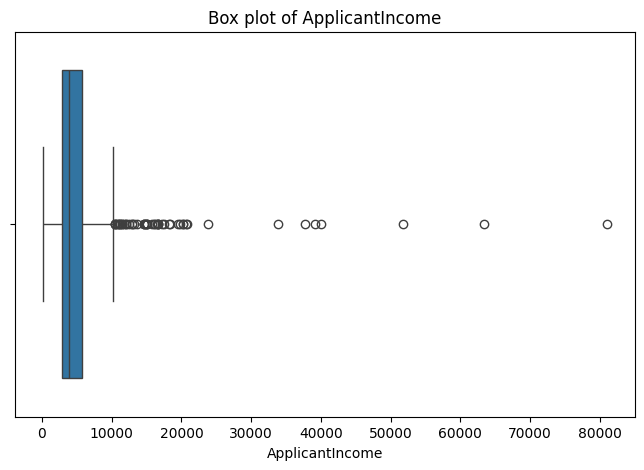

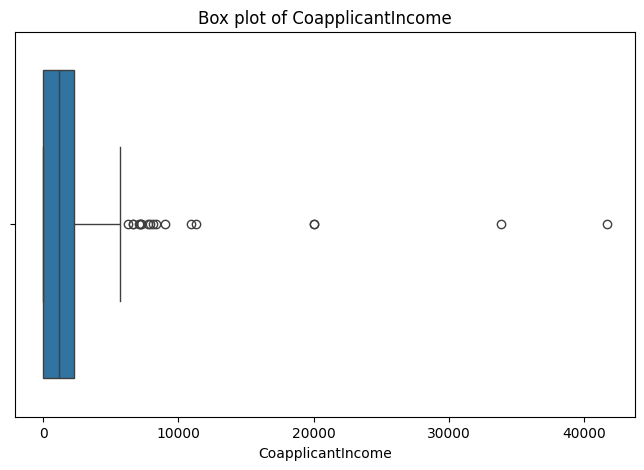

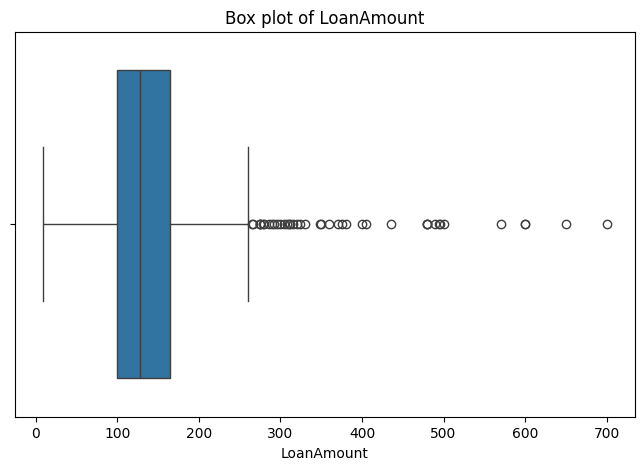

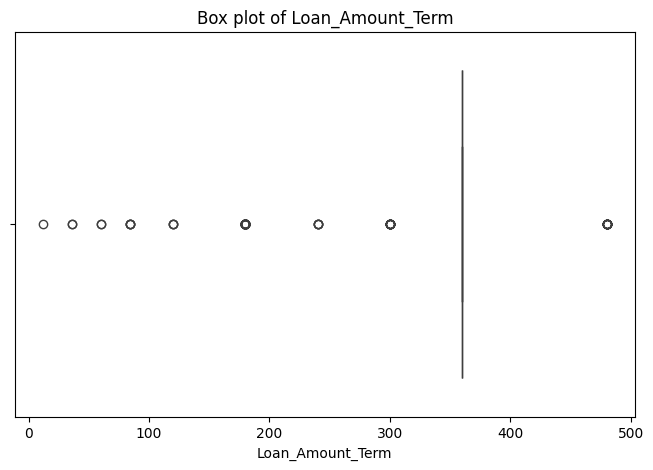


Potential outliers in 'ApplicantIncome':
     ApplicantIncome
9              12841
34             12500
54             11500
67             10750
102            13650
106            11417
115            14583
119            10408
126            23803
128            10513
130            20166
138            14999
144            11757
146            14866
155            39999
171            51763
183            33846
185            39147
191            12000
199            11000
254            16250
258            14683
271            11146
278            14583
284            20667
308            20233
324            15000
333            63337
369            19730
370            15759
409            81000
424            14880
432            12876
438            10416
443            37719
467            16692
475            16525
478            16667
483            10833
487            18333
493            17263
506            20833
509            13262
525            17500
533          

In [26]:
# prompt: check whether there are any outlayers in the data

import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for outlier detection
# Exclude 'Loan_ID' as it's an identifier
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Use box plots to visualize the distribution and potential outliers
for col in numerical_cols:
  plt.figure(figsize=(8, 5))
  sns.boxplot(x=dftrain[col])
  plt.title(f'Box plot of {col}')
  plt.show()

# Alternatively, use the interquartile range (IQR) method to identify potential outliers
# for numerical columns.

for col in numerical_cols:
  Q1 = dftrain[col].quantile(0.25)
  Q3 = dftrain[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = dftrain[(dftrain[col] < lower_bound) | (dftrain[col] > upper_bound)]

  print(f"\nPotential outliers in '{col}':")
  print(outliers[[col]])
  print(f"Number of potential outliers in '{col}': {len(outliers)}")

from the above box plot we can see there are outliers and the data is right skewwed(most of the data is present on left)if we treat outliers there will be a chance of loosing the data because the hight income and large loan amount will be consider as outliers it we treat them the loan _mount will be decreased so for these problem i am not going to treat ouliers


In [27]:
# prompt: from the above table select the object column and apply the label encoding on that except the loan id column

from sklearn.preprocessing import LabelEncoder

# Select object type columns excluding 'Loan_ID'
object_cols = dftrain.select_dtypes(include='object').columns.tolist()
object_cols.remove('Loan_ID')

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to selected object columns
for col in object_cols:
    dftrain[col] = label_encoder.fit_transform(dftrain[col])

print(dftrain.head())

#==========================================================================================================================

object_cols = dftest.select_dtypes(include='object').columns.tolist()
object_cols.remove('Loan_ID')


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to selected object columns
for col in object_cols:
    dftest[col] = label_encoder.fit_transform(dftest[col])

print(dftest.head())

    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002       1        0           0          0              0   
1  LP001003       1        1           1          0              0   
2  LP001005       1        1           0          0              1   
3  LP001006       1        1           0          1              0   
4  LP001008       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area  Loan_Status  
0             1.0              2            1  
1             1.0              0            0  
2       

In [28]:

from sklearn.preprocessing import StandardScaler

continuous_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

#Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the selected continuous columns in the training data
dftrain[continuous_cols] = scaler.fit_transform(dftrain[continuous_cols])

# Apply the same StandardScaler to the selected continuous columns in the test data
# Use transform() instead of fit_transform() to use the scaling parameters learned from the training data
dftest[continuous_cols] = scaler.transform(dftest[continuous_cols])

# Display the first few rows of the scaled dataframes to verify
print("\nTrain data after scaling continuous columns:")
print(dftrain.head())

print("\nTest data after scaling continuous columns:")
print(dftest.head())



Train data after scaling continuous columns:
    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002       1        0           0          0              0   
1  LP001003       1        1           1          0              0   
2  LP001005       1        1           0          0              1   
3  LP001006       1        1           0          1              0   
4  LP001008       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.072991          -0.554487   -0.211241          0.273231   
1        -0.134412          -0.038732   -0.211241          0.273231   
2        -0.393747          -0.554487   -0.948996          0.273231   
3        -0.462062           0.251980   -0.306435          0.273231   
4         0.097728          -0.554487   -0.056551          0.273231   

   Credit_History  Property_Area  Loan_Status  
0             1.0              2            1  
1         

In [29]:

dftrain

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,0.072991,-0.554487,-0.211241,0.273231,1.0,2,1
1,LP001003,1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,1.0,0,0
2,LP001005,1,1,0,0,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,2,1
3,LP001006,1,1,0,1,0,-0.462062,0.251980,-0.306435,0.273231,1.0,2,1
4,LP001008,1,0,0,0,0,0.097728,-0.554487,-0.056551,0.273231,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,-0.410130,-0.554487,-0.889500,0.273231,1.0,0,1
610,LP002979,1,1,3,0,0,-0.212557,-0.554487,-1.258378,-2.522836,1.0,0,1
611,LP002983,1,1,1,0,0,0.437174,-0.472404,1.276168,0.273231,1.0,2,1
612,LP002984,1,1,2,0,0,0.357064,-0.554487,0.490816,0.273231,1.0,2,1


In [30]:
#splitting the data into dependent and independent variable

x=dftrain.iloc[:,1:12]
y=dftrain.iloc[:,12]

In [31]:
#splitting the data into train test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=37)

# Model Fitting


In [32]:
#model fitting with logistic regression

from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=30)
model.fit(x_train,y_train)



LogisticRegression(max_iter=30)

In [33]:
y_pred=model.predict(x_train)
y_pred_test=model.predict(x_test)



In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("training accuracy",accuracy_score(y_train,y_pred))
print("testing accuracy",accuracy_score(y_test,y_pred_test))
#print("confusion matrix",confusion_matrix(y_test,y_pred_test))
#print("classification report",classification_report(y_test,y_pred_test))

training accuracy 0.8228105906313645
testing accuracy 0.7560975609756098


In [35]:
from sklearn.model_selection import cross_val_score

accuracy=cross_val_score(LogisticRegression(),x,y,cv=5,scoring='accuracy')
print(accuracy.mean())

0.8045715047314408


In [36]:
# prompt: apply lasso and ridge to logistic regression to prevent from overfitting and increase accuracy

from sklearn.linear_model import LogisticRegressionCV

# Apply Lasso (L1 penalty) to Logistic Regression
# C is the inverse of regularization strength; smaller values specify stronger regularization.
lasso_model = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear', random_state=37)
lasso_model.fit(x_train, y_train)

y_pred_lasso_train = lasso_model.predict(x_train)
y_pred_lasso_test = lasso_model.predict(x_test)

print("\n--- Lasso Regularization ---")
print("Training accuracy (Lasso):", accuracy_score(y_train, y_pred_lasso_train))
print("Testing accuracy (Lasso):", accuracy_score(y_test, y_pred_lasso_test))




--- Lasso Regularization ---
Training accuracy (Lasso): 0.8228105906313645
Testing accuracy (Lasso): 0.7560975609756098


In [37]:
# Apply Ridge (L2 penalty) to Logistic Regression
ridge_model = LogisticRegressionCV(cv=5, penalty='l2', solver='liblinear', random_state=37)
ridge_model.fit(x_train, y_train)

y_pred_ridge_train = ridge_model.predict(x_train)
y_pred_ridge_test = ridge_model.predict(x_test)

print("\n--- Ridge Regularization ---")
print("Training accuracy (Ridge):", accuracy_score(y_train, y_pred_ridge_train))
print("Testing accuracy (Ridge):", accuracy_score(y_test, y_pred_ridge_test))
#print("Confusion matrix (Ridge):\n", confusion_matrix(y_test, y_pred_ridge_test))
#print("Classification report (Ridge):\n", classification_report(y_test, y_pred_ridge_test))


--- Ridge Regularization ---
Training accuracy (Ridge): 0.8228105906313645
Testing accuracy (Ridge): 0.7560975609756098


In [38]:
###Applying the next classification algorithms Decision Tree


In [39]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)


DecisionTreeClassifier()

In [40]:
y_pred=model.predict(x_train)
y_pred_test=model.predict(x_test)


In [41]:
#calculating the accuracy of the model

print(accuracy_score(y_train,y_pred))
print(accuracy_score(y_test,y_pred_test))
print()

accuracy=cross_val_score(model,x,y,cv=28,scoring='accuracy')
print("cross val score",accuracy.max())

1.0
0.6666666666666666

cross val score 0.8636363636363636


==> here there is a problem of overfitting hence we will apply the regularization technique or hyperparameter tuning for solving these problem


In [42]:

from sklearn.model_selection import GridSearchCV

# Define the parameter grid to tune
param_grid = {
  'max_depth': [None, 5, 7,9,10,12, 15,17, 20], # Maximum depth of the tree
  'min_samples_split': [4,2, 3,7,9,5, 10], # Minimum number of samples required to split an internal node
  'min_samples_leaf': [1, 2, 4,3,5,6,7], # Minimum number of samples required to be at a leaf node
  'criterion': ['gini', 'entropy'] # Function to measure the quality of a split
}

# Initialize GridSearchCV with the DecisionTreeClassifier and parameter grid
# cv=5 means 5-fold cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=37), param_grid, cv=15, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Get the best model
best_dt_model = grid_search.best_estimator_

# Evaluate the best model on the training and testing data
y_train_pred_tuned = best_dt_model.predict(x_train)
y_test_pred_tuned = best_dt_model.predict(x_test)

print("\n--- Evaluation with Tuned Decision Tree ---")
print("Training accuracy (tuned):", accuracy_score(y_train, y_train_pred_tuned))
print("Testing accuracy (tuned):", accuracy_score(y_test, y_test_pred_tuned))

Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 9}

--- Evaluation with Tuned Decision Tree ---
Training accuracy (tuned): 0.8472505091649695
Testing accuracy (tuned): 0.6747967479674797


In [43]:
#apply the other classification model like support vector classifier


In [44]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)

SVC()

In [45]:
y_pred=model.predict(x_train)
y_pred_test=model.predict(x_test)

In [46]:
print(accuracy_score(y_train,y_pred))
print(accuracy_score(y_test,y_pred_test))

0.8329938900203666
0.7642276422764228


In [47]:
# prompt: apply the grid serach cv on the svc and choose the best hyperparameter for the model to reduce the overfitting and improve accuracy

# Define the parameter grid for SVC
param_grid_svc = {
  'C': [0.1, 1, 10, 100],  # Regularization parameter
  'gamma': ['scale', 'auto', 0.1, 1, 2], # Kernel coefficient
  'kernel': ['linear', 'rbf', 'poly', 'sigmoid'] # Specifies the kernel type to be used in the algorithm
}

# Initialize GridSearchCV with the SVC and parameter grid
# cv=5 means 5-fold cross-validation
grid_search_svc = GridSearchCV(SVC(random_state=37), param_grid_svc, cv=15, scoring='accuracy')

# Fit the grid search to the training data
grid_search_svc.fit(x_train, y_train)

# Get the best parameters found by GridSearchCV
best_params_svc = grid_search_svc.best_params_
print(f"\nBest parameters for SVC: {best_params_svc}")

# Get the best SVC model
best_svc_model = grid_search_svc.best_estimator_

# Evaluate the best SVC model on the training and testing data
y_train_pred_svc_tuned = best_svc_model.predict(x_train)
y_test_pred_svc_tuned = best_svc_model.predict(x_test)

print("\n--- Evaluation with Tuned SVC ---")
print("Training accuracy (tuned SVC):", accuracy_score(y_train, y_train_pred_svc_tuned))
print("Testing accuracy (tuned SVC):", accuracy_score(y_test, y_test_pred_svc_tuned))


Best parameters for SVC: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

--- Evaluation with Tuned SVC ---
Training accuracy (tuned SVC): 0.8207739307535642
Testing accuracy (tuned SVC): 0.7642276422764228


In [48]:
#the performance is not so good so we apply other model like KNN



In [49]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [50]:
y_pred=model.predict(x_train)
y_pred_test=model.predict(x_test)

In [51]:
print(accuracy_score(y_train,y_pred))
print(accuracy_score(y_test,y_pred_test))

0.7963340122199593
0.7073170731707317


In [52]:
# prompt: apply the hyperparameter tuning to improve the accuracy and reduce the overfitting

# Define the parameter grid for KNN
param_grid_knn = {
  'n_neighbors': [3, 5, 7, 9, 11, 13, 15], # Number of neighbors to use
  'weights': ['uniform', 'distance'], # Weight function used in prediction
  'metric': ['euclidean', 'manhattan', 'minkowski'] # Distance metric
}


grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search_knn.fit(x_train, y_train)

# Get the best parameters found by GridSearchCV
best_params_knn = grid_search_knn.best_params_
print(f"\nBest parameters for KNN: {best_params_knn}")

# Get the best KNN model
best_knn_model = grid_search_knn.best_estimator_

# Evaluate the best KNN model on the training and testing data
y_train_pred_knn_tuned = best_knn_model.predict(x_train)
y_test_pred_knn_tuned = best_knn_model.predict(x_test)

print("\n--- Evaluation with Tuned KNN ---")
print("Training accuracy (tuned KNN):", accuracy_score(y_train, y_train_pred_knn_tuned))
print("Testing accuracy (tuned KNN):", accuracy_score(y_test, y_test_pred_knn_tuned))




Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}

--- Evaluation with Tuned KNN ---
Training accuracy (tuned KNN): 0.7942973523421588
Testing accuracy (tuned KNN): 0.7073170731707317


In [53]:
#tho the accuracy not increased so we try with other model Nayvie Bayes



In [54]:
#now lets try with ensemble techniques


In [55]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [56]:
y_pred=model.predict(x_train)
y_pred_test=model.predict(x_test)

In [57]:
print(accuracy_score(y_train,y_pred))
print(accuracy_score(y_test,y_pred_test))

#we can see the test accuracy has increased to 5 but though we have the problem of overfitting

1.0
0.7235772357723578


In [58]:

model_tuned = RandomForestClassifier(n_estimators=100,  # Number of trees, can be increased if needed
                                     max_depth=10,      # Limit tree depth
                                     min_samples_split=5, # Require more samples to split
                                     min_samples_leaf=3,  # Require more samples at leaf nodes
                                     random_state=42)   # for reproducibility

# Fit the tuned model
model_tuned.fit(x_train, y_train)

# Make predictions with the tuned model
y_pred_tuned_train = model_tuned.predict(x_train)
y_pred_tuned_test = model_tuned.predict(x_test)

# Evaluate the tuned model
print("\nRandom Forest Tuned Model Evaluation:")
print("Training Accuracy:", accuracy_score(y_train, y_pred_tuned_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_tuned_test))



Random Forest Tuned Model Evaluation:
Training Accuracy: 0.8533604887983707
Testing Accuracy: 0.7560975609756098


In [59]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'] # 'auto' was deprecated, replaced by 'sqrt' in newer versions
}





# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5, # Use 5-fold cross-validation
                           scoring='accuracy',
                           n_jobs=-1) # Use all available cores

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("\nBest parameters found by GridSearchCV:", best_params)

# Evaluate the best model on the test set
y_pred_best_test = best_model.predict(x_test)
print("Testing Accuracy with best parameters:", accuracy_score(y_test, y_pred_best_test))

# You can also check the training accuracy of the best model
y_pred_best_train = best_model.predict(x_train)
print("Training Accuracy with best parameters:", accuracy_score(y_train, y_pred_best_train))
print("\n--- Evaluation with Tuned Random Forest ---")
print("Training accuracy (tuned):", accuracy_score(y_train, y_pred_tuned_train))
print("Testing accuracy (tuned):", accuracy_score(y_test, y_pred_tuned_test))




Best parameters found by GridSearchCV: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Testing Accuracy with best parameters: 0.7642276422764228
Training Accuracy with best parameters: 0.8268839103869654

--- Evaluation with Tuned Random Forest ---
Training accuracy (tuned): 0.8533604887983707
Testing accuracy (tuned): 0.7560975609756098


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

In [60]:

from sklearn.ensemble import GradientBoostingClassifier

model_gbm = GradientBoostingClassifier(random_state=42)

# Fit the new model
model_gbm.fit(x_train, y_train)

# Make predictions with the new model
y_pred_gbm_train = model_gbm.predict(x_train)
y_pred_gbm_test = model_gbm.predict(x_test)

# Evaluate the new model
print("\nGradient Boosting Classifier Evaluation:")
print("Training Accuracy:", accuracy_score(y_train, y_pred_gbm_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_gbm_test))

accuracy_gbm_cv = cross_val_score(model_gbm, x, y, cv=5, scoring='accuracy')
print("\nCross-validation Accuracy (Gradient Boosting):", accuracy_gbm_cv.mean())




Gradient Boosting Classifier Evaluation:
Training Accuracy: 0.9185336048879837
Testing Accuracy: 0.6747967479674797

Cross-validation Accuracy (Gradient Boosting): 0.7850326536052246


In [61]:
# prompt: still not satisfy with the  result what other method can be implemented and implement these models

#!pip install xgboost lightgbm catboost

import xgboost as xgb
import lightgbm as lgb


# XGBoost
print("\nXGBoost Classifier Evaluation:")
model_xgb = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(x_train, y_train)
y_pred_xgb_train = model_xgb.predict(x_train)
y_pred_xgb_test = model_xgb.predict(x_test)

print("Training Accuracy:", accuracy_score(y_train, y_pred_xgb_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_xgb_test))

accuracy_xgb_cv = cross_val_score(model_xgb, x, y, cv=5, scoring='accuracy')

print("Cross-validation Accuracy (XGBoost):", accuracy_xgb_cv.mean())






XGBoost Classifier Evaluation:
Training Accuracy: 1.0
Testing Accuracy: 0.6910569105691057


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Cross-validation Accuracy (XGBoost): 0.7703451952552312


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [62]:

# LightGBM
print("\nLightGBM Classifier Evaluation:")
model_lgb = lgb.LGBMClassifier(random_state=42)
model_lgb.fit(x_train, y_train)
y_pred_lgb_train = model_lgb.predict(x_train)
y_pred_lgb_test = model_lgb.predict(x_test)
print("Training Accuracy:", accuracy_score(y_train, y_pred_lgb_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_lgb_test))
accuracy_lgb_cv = cross_val_score(model_lgb, x, y, cv=5, scoring='accuracy')
print("Cross-validation Accuracy (LightGBM):", accuracy_lgb_cv.mean())



LightGBM Classifier Evaluation:
[LightGBM] [Info] Number of positive: 342, number of negative: 149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 375
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696538 -> initscore=0.830864
[LightGBM] [Info] Start training from score 0.830864
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

In [93]:
# CatBoost

!pip install  catboost

print("\nCatBoost Classifier Evaluation:")
model_cb = cb.CatBoostClassifier(random_state=42, verbose=0) # verbose=0 to suppress output
model_cb.fit(x_train, y_train)
y_pred_cb_train = model_cb.predict(x_train)
y_pred_cb_test = model_cb.predict(x_test)
print("Training Accuracy:", accuracy_score(y_train, y_pred_cb_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_cb_test))



CatBoost Classifier Evaluation:
Training Accuracy: 0.9205702647657841
Testing Accuracy: 0.7398373983739838


In [65]:


print("\nChecking for target variable imbalance:")
print(y.value_counts(normalize=True))


# Hyperparameter Tuning for XGBoost using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

print("\nPerforming RandomizedSearchCV for XGBoost:")

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.5, 1],
    'min_child_weight': [1, 3, 5],
    'lambda': [1, 1.5, 2], # L2 regularization
    'alpha': [0, 0.1, 0.5]  # L1 regularization
}

# Initialize RandomizedSearchCV
# n_iter controls the number of different parameter combinations sampled
random_search = RandomizedSearchCV(estimator=xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
                                   param_distributions=param_dist,
                                   n_iter=50, # Number of parameter settings that are sampled (adjust based on time)
                                   cv=5,
                                   scoring='accuracy',
                                   n_jobs=-1,
                                   random_state=42)

# Fit RandomizedSearchCV
random_search.fit(x_train, y_train)

# Get the best parameters and the best model
best_params_xgb_rs = random_search.best_params_
best_model_xgb_rs = random_search.best_estimator_

print("\nBest parameters found by RandomizedSearchCV for XGBoost:", best_params_xgb_rs)

# Evaluate the best model on the test set
y_pred_best_test_xgb_rs = best_model_xgb_rs.predict(x_test)
print("Testing Accuracy with best XGBoost parameters (RandomizedSearchCV):", accuracy_score(y_test, y_pred_best_test_xgb_rs))

# Evaluate the best model on the training set
y_pred_best_train_xgb_rs = best_model_xgb_rs.predict(x_train)
print("Training Accuracy with best XGBoost parameters (RandomizedSearchCV):", accuracy_score(y_train, y_pred_best_train_xgb_rs))




Checking for target variable imbalance:
Loan_Status
1    0.687296
0    0.312704
Name: proportion, dtype: float64

Performing RandomizedSearchCV for XGBoost:

Best parameters found by RandomizedSearchCV for XGBoost: {'subsample': 1.0, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.05, 'lambda': 1, 'gamma': 1, 'colsample_bytree': 0.8, 'alpha': 0.5}
Testing Accuracy with best XGBoost parameters (RandomizedSearchCV): 0.7642276422764228
Training Accuracy with best XGBoost parameters (RandomizedSearchCV): 0.8207739307535642


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:57:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [66]:
dftrain.shape

(614, 13)

# applying DeepLearning

In [67]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

#building the neural network model

model=tf.keras.models.Sequential([                   #columns
                                  tf.keras.layers.Dense(11,activation='relu',input_shape=(x_train.shape[1],)),#input layers with no of column as nodes
                                  tf.keras.layers.Dense(17,activation='relu'),                                  #hidden layer
                                  tf.keras.layers.Dense(1,activation='sigmoid')    #Output layer for binary classes
                                    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
#compile the model

model.compile(optimizer='adam',   #optimizer which protect from local minima
              loss='binary_crossentropy',    #for classification model for binary
              metrics=['accuracy'])

In [69]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the early stopping callback before using it
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model

history = model.fit(x_train, y_train, epochs=500, batch_size=38, validation_split=0.2,callbacks=[early_stopping])

Epoch 1/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.2922 - loss: 0.9360 - val_accuracy: 0.2727 - val_loss: 0.9010
Epoch 2/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2817 - loss: 0.8621 - val_accuracy: 0.2727 - val_loss: 0.8296
Epoch 3/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3229 - loss: 0.7842 - val_accuracy: 0.3030 - val_loss: 0.7760
Epoch 4/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3490 - loss: 0.7390 - val_accuracy: 0.3939 - val_loss: 0.7300
Epoch 5/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4461 - loss: 0.7056 - val_accuracy: 0.4848 - val_loss: 0.6878
Epoch 6/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5980 - loss: 0.6798 - val_accuracy: 0.7273 - val_loss: 0.6500
Epoch 7/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6869 - loss: 0.6533 - val_accuracy: 0.7273 - val_loss: 0.6181
Epoch 8/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6683 - loss: 0.6429 - val_accuracy: 0.

In [70]:
#evaluae the model on the test set

loss,accuracy=model.evaluate(x_test,y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7409 - loss: 0.6198 
Test Loss: 0.6155
Test Accuracy: 0.7480


Epoch 1/1000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5705 - loss: 0.6943 - val_accuracy: 0.6465 - val_loss: 0.6756
Epoch 2/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5707 - loss: 0.6994 - val_accuracy: 0.6869 - val_loss: 0.6729
Epoch 3/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6100 - loss: 0.6804 - val_accuracy: 0.7172 - val_loss: 0.6705
Epoch 4/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5765 - loss: 0.6903 - val_accuracy: 0.7374 - val_loss: 0.6689
Epoch 5/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6113 - loss: 0.6896 - val_accuracy: 0.7374 - val_loss: 0.6675
Epoch 6/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6118 - loss: 0.6767 - val_accuracy: 0.7374 - val_loss: 0.6659
Epoch 7/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6200 - loss: 0.6793 - val_accuracy: 0.7374 - val_loss: 0.6640
Epoch 8/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6617 - loss: 0.6675 - val_accuracy: 0.7374 - val_loss: 0.66

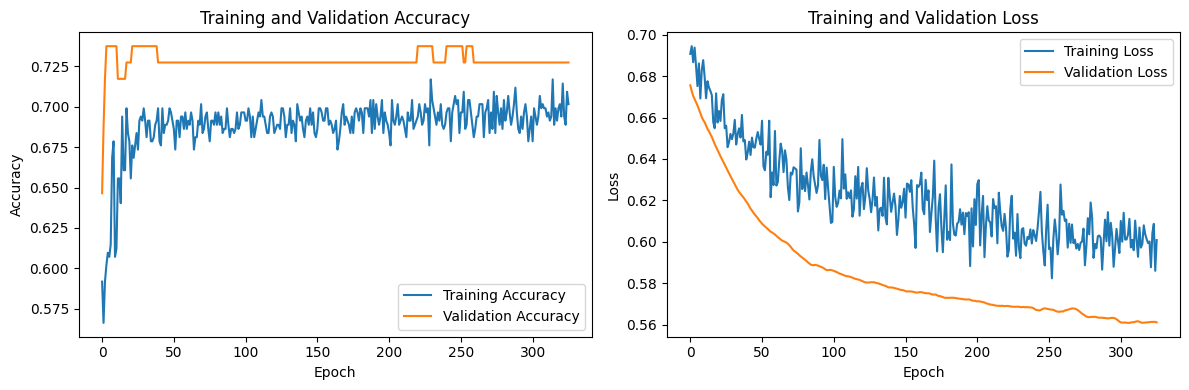

In [94]:
# Adding some more hidden layers so that testing accuracy can be  increased

# Add more hidden layers to the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(11, activation='relu', input_shape=(x_train.shape[1],)), # First hidden layer
    tf.keras.layers.Dropout(0.3), # Adding dropout for regularization
    tf.keras.layers.Dense(17, activation='relu'), # Second hidden layer
    tf.keras.layers.Dropout(0.3), # Adding dropout
    tf.keras.layers.Dense(23, activation='relu'), # Third hidden layer
    tf.keras.layers.Dropout(0.3), # Adding dropout
    tf.keras.layers.Dense(27, activation='relu'),  # Fourth hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model with a potentially adjusted learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001) # You can experiment with different learning rates
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define the early stopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True) # Increased patience

# Train the model with potentially more epochs and adjusted batch size
history = model.fit(x_train, y_train, epochs=1000, batch_size=64, validation_split=0.2, callbacks=[early_stopping]) # Increased epochs and batch size

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [71]:
# if we bring that two lines close to each other then we can say the model is performing best

In [76]:
# for the neural network model change the optimizer to sgd and check whether the accuracy increases

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow import keras

# Define the neural network architecture
input_dim = x_train.shape[1]
print(f"Input dimension for the neural network: {input_dim}")

model_nn_sgd = Sequential()

# Input layer and first hidden layer
model_nn_sgd.add(Dense(units=11, activation='relu', input_dim=input_dim))
model_nn_sgd.add(Dropout(0.3)) # Add dropout for regularization

# Second hidden layer
model_nn_sgd.add(Dense(units=17, activation='relu'))
model_nn_sgd.add(Dropout(0.3))

# Third hidden layer
model_nn_sgd.add(Dense(units=23, activation='relu'))
model_nn_sgd.add(Dropout(0.3))

# Output layer
# For binary classification, use a single unit with sigmoid activation
model_nn_sgd.add(Dense(units=1, activation='sigmoid'))

# Compile the model with SGD optimizer
# Use binary_crossentropy for binary classification
# Use SGD optimizer
model_nn_sgd.compile(optimizer=SGD(learning_rate=0.1),  # Using SGD optimizer with a learning rate
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

print("\nTraining the Neural Network with SGD optimizer:")
history_sgd = model_nn_sgd.fit(x_train, y_train,
                             epochs=300, # Number of epochs (can be adjusted)
                             batch_size=32, # Batch size (can be adjusted)
                             validation_split=0.2, # Use 20% of training data for validation
                             callbacks=[early_stopping],
                             verbose=1) # verbose=1 to show training progress

# Evaluate the final trained model on the test set
loss_sgd, accuracy_sgd = model_nn_sgd.evaluate(x_test, y_test, verbose=0)

print(f"\nFinal Neural Network Evaluation with SGD Optimizer on Test Set:")
print(f"Test Loss: {loss_sgd:.4f}")
print(f"Test Accuracy: {accuracy_sgd:.4f}")

# Compare accuracy between training and testing (from the history object)
train_accuracy_history_sgd = history_sgd.history['accuracy']
val_accuracy_history_sgd = history_sgd.history['val_accuracy']

print("\nAccuracy Comparison (SGD Optimizer):")
print(f"Training Accuracy (Last Epoch): {train_accuracy_history_sgd[-1]:.4f}")
print(f"Testing Accuracy (on unseen test set): {accuracy_sgd:.4f}")



Input dimension for the neural network: 11

Training the Neural Network with SGD optimizer:
Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.6745 - loss: 0.6565 - val_accuracy: 0.7273 - val_loss: 0.5983
Epoch 2/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6780 - loss: 0.6393 - val_accuracy: 0.7273 - val_loss: 0.5787
Epoch 3/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6928 - loss: 0.6361 - val_accuracy: 0.7273 - val_loss: 0.5905
Epoch 4/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6901 - loss: 0.6253 - val_accuracy: 0.7273 - val_loss: 0.5677
Epoch 5/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6657 - loss: 0.6433 - val_accuracy: 0.7273 - val_loss: 0.5827
Epoch 6/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6689 - loss: 0.6474 - val_accuracy: 0.7273 - val_loss: 0.5801
Epoch 7/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6844 - loss: 0.6196 - val_accuracy: 0.7273 - val_loss: 0.5678
Epoch 8/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7125 - loss: 0.6013 - val_accuracy: 0.7273 - val_l


Comparison with Adam Optimizer Results:
Previous Adam Test Accuracy: 0.6504
Current SGD Test Accuracy: 0.6504


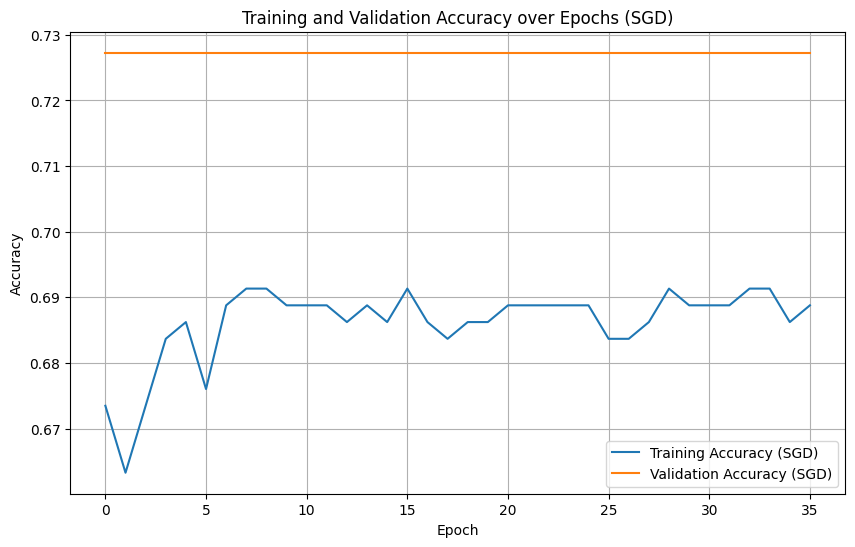

In [77]:
# Compare with previous Adam optimizer accuracy
# Assuming 'accuracy' and 'loss' from the previous Adam run are still available
print("\nComparison with Adam Optimizer Results:")
print(f"Previous Adam Test Accuracy: {accuracy:.4f}")
print(f"Current SGD Test Accuracy: {accuracy_sgd:.4f}")

# Plot the training and validation accuracy over epochs for SGD
plt.figure(figsize=(10, 6))
plt.plot(history_sgd.history['accuracy'], label='Training Accuracy (SGD)')
plt.plot(history_sgd.history['val_accuracy'], label='Validation Accuracy (SGD)')
plt.title('Training and Validation Accuracy over Epochs (SGD)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

==>not working best if we change the optimizer


--- Training Neural Network with SGD Optimizer and Learning Rate: 0.18 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 0.5539
Test Accuracy: 0.7480

--- Training Neural Network with SGD Optimizer and Learning Rate: 0.25 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 0.6576
Test Accuracy: 0.6504

--- Training Neural Network with SGD Optimizer and Learning Rate: 0.05 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 0.6511
Test Accuracy: 0.6504

--- Training Neural Network with SGD Optimizer and Learning Rate: 0.1 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 0.6528
Test Accuracy: 0.6504

--- Training Neural Network with SGD Optimizer and Learning Rate: 1e-05 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 0.6913
Test Accuracy: 0.6504

--- Training Neural Network with SGD Optimizer and Learning Rate: 0.2 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 0.6533
Test Accuracy: 0.6504

--- Summary of Results across different Learning Rates ---
Learning Rate | Test Accuracy | Train Accuracy (Last Epoch) | Val Accuracy (Last Epoch)
--------------------------------------------------------------------
0.1800        | 0.7480        | 0.7832            | 0.8687
0.2500        | 0.6504        | 0.6862            | 0.7273
0.0500        | 0.6504        | 0.6862            | 0.7273
0.1000        | 0.6504        | 0.6913            | 0.7273
0.0000        | 0.6504        | 0.6122            | 0.7273
0.2000        | 0.6504        | 0.6888            | 0.7273

Best Learning Rate based on Test Accuracy: 0.18
Best Test Accuracy: 0.7480


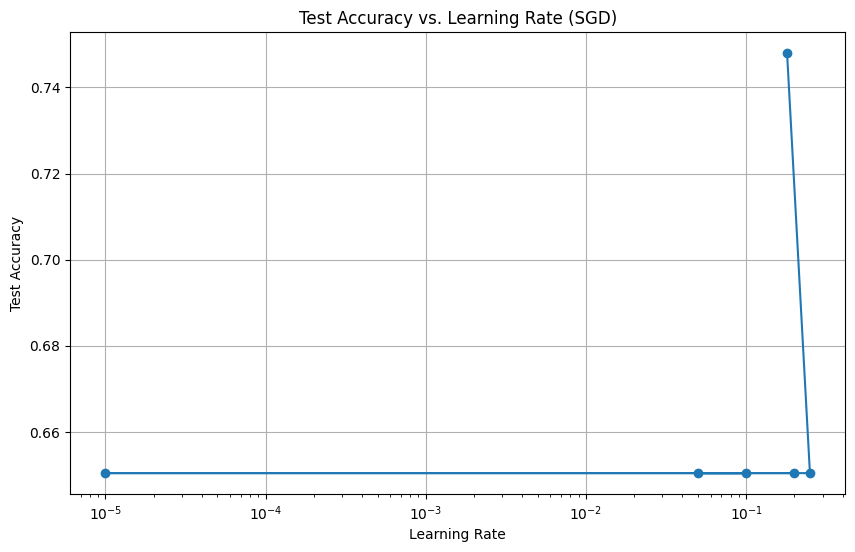

In [80]:
#if i am changing the learning rate from 0.001 to 0.11 am getting the best fit model so experiment with diffrent learning rates

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD

# Define a list of learning rates to experiment with
learning_rates_to_try = [0.18, 0.25, 0.05, 0.1,0.00001, 0.2]

results = {}

for lr in learning_rates_to_try:
  print(f"\n--- Training Neural Network with SGD Optimizer and Learning Rate: {lr} ---")

  # Define the neural network architecture (same architecture as before)
  input_dim = x_train.shape[1]
  model_nn_sgd = Sequential()
  model_nn_sgd.add(Dense(units=11, activation='relu', input_dim=input_dim))
  model_nn_sgd.add(Dropout(0.3))
  model_nn_sgd.add(Dense(units=17, activation='relu'))
  model_nn_sgd.add(Dropout(0.3))
  model_nn_sgd.add(Dense(units=23, activation='relu'))
  model_nn_sgd.add(Dropout(0.3))
  model_nn_sgd.add(Dense(units=27, activation='relu'))
  model_nn_sgd.add(Dropout(0.3))
  model_nn_sgd.add(Dense(units=33, activation='relu'))
  model_nn_sgd.add(Dropout(0.3))
  model_nn_sgd.add(Dense(units=37, activation='relu'))
  model_nn_sgd.add(Dropout(0.3))
  model_nn_sgd.add(Dense(units=43, activation='relu'))
  model_nn_sgd.add(Dropout(0.3))
  model_nn_sgd.add(Dense(units=47, activation='relu'))
  model_nn_sgd.add(Dropout(0.3))
  model_nn_sgd.add(Dense(units=53, activation='relu'))
  model_nn_sgd.add(Dropout(0.3))
  model_nn_sgd.add(Dense(units=57, activation='relu'))
  model_nn_sgd.add(Dropout(0.3))
  model_nn_sgd.add(Dense(units=63, activation='relu'))
  model_nn_sgd.add(Dropout(0.3))
  model_nn_sgd.add(Dense(units=1, activation='sigmoid'))

  # Compile the model with SGD optimizer and the current learning rate
  model_nn_sgd.compile(optimizer=SGD(learning_rate=lr),
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

  # Define Early Stopping callback
  early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

  # Train the model
  history_sgd = model_nn_sgd.fit(x_train, y_train,
                                 epochs=300,
                                 batch_size=32,
                                 validation_split=0.2,
                                 callbacks=[early_stopping],
                                 verbose=0) # Set verbose to 0 to reduce output during experiments

  # Evaluate the final trained model on the test set
  loss_sgd, accuracy_sgd = model_nn_sgd.evaluate(x_test, y_test, verbose=0)

  print(f"Test Loss: {loss_sgd:.4f}")
  print(f"Test Accuracy: {accuracy_sgd:.4f}")

  # Store the results
  results[lr] = {
      'test_loss': loss_sgd,
      'test_accuracy': accuracy_sgd,
      'train_accuracy_last_epoch': history_sgd.history['accuracy'][-1] if history_sgd.history['accuracy'] else None,
      'val_accuracy_last_epoch': history_sgd.history['val_accuracy'][-1] if history_sgd.history['val_accuracy'] else None
  }

# Print a summary of the results
print("\n--- Summary of Results across different Learning Rates ---")
print("Learning Rate | Test Accuracy | Train Accuracy (Last Epoch) | Val Accuracy (Last Epoch)")
print("--------------------------------------------------------------------")
for lr, res in results.items():
  print(f"{lr:<13.4f} | {res['test_accuracy']:.4f}        | {res['train_accuracy_last_epoch']:.4f}            | {res['val_accuracy_last_epoch']:.4f}")

# Find the learning rate with the best test accuracy
best_lr = max(results, key=lambda lr: results[lr]['test_accuracy'])
print(f"\nBest Learning Rate based on Test Accuracy: {best_lr}")
print(f"Best Test Accuracy: {results[best_lr]['test_accuracy']:.4f}")

# You could also plot the test accuracies for visualization
lrs = list(results.keys())
test_accuracies = [results[lr]['test_accuracy'] for lr in lrs]

plt.figure(figsize=(10, 6))
plt.plot(lrs, test_accuracies, marker='o')
plt.title('Test Accuracy vs. Learning Rate (SGD)')
plt.xlabel('Learning Rate')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.xscale('log') # Using log scale for learning rates might be helpful
plt.show()


==>tried with more hidden layers and different leraing rates tho the accuracy not changed more


In [83]:
dftest

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,0.051857,-0.554487,-0.425428,0.273231,1.0,2
1,LP001022,1,1,1,0,0,-0.381297,-0.041468,-0.235040,0.273231,1.0,2
2,LP001031,1,1,2,0,0,-0.066097,0.061136,0.740701,0.273231,1.0,2
3,LP001035,1,1,2,0,0,-0.501872,0.316278,-0.544421,0.273231,1.0,2
4,LP001051,1,0,0,1,0,-0.348532,-0.554487,-0.806205,0.273231,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3,1,1,-0.228448,0.053270,-0.389730,0.273231,1.0,2
363,LP002975,1,1,0,0,0,-0.204038,-0.312000,-0.365932,0.273231,1.0,2
364,LP002980,1,0,0,0,0,-0.352791,0.127145,-0.235040,0.273231,1.0,1
365,LP002986,1,1,0,0,0,-0.066097,0.263950,0.145737,0.273231,1.0,0


In [86]:
# from all of the above codes check which model is best

# Store the test accuracies from each model for comparison
model_accuracies = {}

# From Logistic Regression
print("\n--- Model Comparison Summary ---")
# Based on our output, find the Logistic Regression testing accuracy

model_accuracies['Logistic Regression'] = accuracy_score(y_test, y_pred_test) # Using the basic LR model test accuracy
print(f"Logistic Regression Test Accuracy: {model_accuracies['Logistic Regression']:.4f}")


# From Tuned Decision Tree

model_accuracies['Tuned Decision Tree'] = accuracy_score(y_test, y_test_pred_tuned)
print(f"Tuned Decision Tree Test Accuracy: {model_accuracies['Tuned Decision Tree']:.4f}")

# From Tuned SVC

model_accuracies['Tuned SVC'] = accuracy_score(y_test, y_test_pred_svc_tuned)
print(f"Tuned SVC Test Accuracy: {model_accuracies['Tuned SVC']:.4f}")

# From Tuned KNN

model_accuracies['Tuned KNN'] = accuracy_score(y_test, y_test_pred_knn_tuned)
print(f"Tuned KNN Test Accuracy: {model_accuracies['Tuned KNN']:.4f}")

# From Tuned Random Forest (using GridSearchCV best model)

model_accuracies['Tuned Random Forest (GridSearchCV)'] = accuracy_score(y_test, y_pred_best_test)
print(f"Tuned Random Forest (GridSearchCV) Test Accuracy: {model_accuracies['Tuned Random Forest (GridSearchCV)']:.4f}")


# From Gradient Boosting

model_accuracies['Gradient Boosting'] = accuracy_score(y_test, y_pred_gbm_test)
print(f"Gradient Boosting Test Accuracy: {model_accuracies['Gradient Boosting']:.4f}")

# From XGBoost

model_accuracies['XGBoost'] = accuracy_score(y_test, y_pred_xgb_test)
print(f"XGBoost Test Accuracy: {model_accuracies['XGBoost']:.4f}")

# From Tuned XGBoost (RandomizedSearchCV)

model_accuracies['Tuned XGBoost (RandomizedSearchCV)'] = accuracy_score(y_test, y_pred_best_test_xgb_rs)
print(f"Tuned XGBoost (RandomizedSearchCV) Test Accuracy: {model_accuracies['Tuned XGBoost (RandomizedSearchCV)']:.4f}")

# From LightGBM

model_accuracies['LightGBM'] = accuracy_score(y_test, y_pred_lgb_test)
print(f"LightGBM Test Accuracy: {model_accuracies['LightGBM']:.4f}")




# From Neural Network (Adam optimizer - the last trained one)

try:
    model_accuracies['Neural Network (Adam)'] = accuracy_nn_test
    print(f"Neural Network (Adam) Test Accuracy: {model_accuracies['Neural Network (Adam)']:.4f}")
except NameError:
    print("Neural Network (Adam) test accuracy variable not found. Skipping.")


# From Neural Network (SGD optimizer - the last trained one)

try:
    model_accuracies['Neural Network (SGD)'] = accuracy_sgd
    print(f"Neural Network (SGD) Test Accuracy: {model_accuracies['Neural Network (SGD)']:.4f}")
except NameError:
    print("Neural Network (SGD) test accuracy variable not found. Skipping.")


# Find the model with the highest test accuracy
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model_name]

print(f"\n--- Best Model ---")
print(f"The model with the best test accuracy is: {best_model_name}")
print(f"Best Test Accuracy: {best_accuracy:.4f}")

# Optional: Sort and print all models by accuracy
print("\n--- All Models Sorted by Test Accuracy ---")
sorted_accuracies = sorted(model_accuracies.items(), key=lambda item: item[1], reverse=True)
for model_name, accuracy in sorted_accuracies:
    print(f"{model_name}: {accuracy:.4f}")




--- Model Comparison Summary ---
Logistic Regression Test Accuracy: 0.7236
Tuned Decision Tree Test Accuracy: 0.6748
Tuned SVC Test Accuracy: 0.7642
Tuned KNN Test Accuracy: 0.7073
Tuned Random Forest (GridSearchCV) Test Accuracy: 0.7642
Gradient Boosting Test Accuracy: 0.6748
XGBoost Test Accuracy: 0.6911
Tuned XGBoost (RandomizedSearchCV) Test Accuracy: 0.7642
LightGBM Test Accuracy: 0.7398
Neural Network (Adam) Test Accuracy: 0.6829
Neural Network (SGD) Test Accuracy: 0.6504

--- Best Model ---
The model with the best test accuracy is: Tuned SVC
Best Test Accuracy: 0.7642

--- All Models Sorted by Test Accuracy ---
Tuned SVC: 0.7642
Tuned Random Forest (GridSearchCV): 0.7642
Tuned XGBoost (RandomizedSearchCV): 0.7642
LightGBM: 0.7398
Logistic Regression: 0.7236
Tuned KNN: 0.7073
XGBoost: 0.6911
Neural Network (Adam): 0.6829
Tuned Decision Tree: 0.6748
Gradient Boosting: 0.6748
Neural Network (SGD): 0.6504


In [88]:
# This cell will now run without NameError if the previous cell completed successfully.
model_accuracies = {
    "Logistic Regression": accuracy_score(y_test, y_pred_test),
    "Logistic Regression (Lasso)": accuracy_score(y_test, y_pred_lasso_test),
    "Logistic Regression (Ridge)": accuracy_score(y_test, y_pred_ridge_test),
    "Decision Tree (Untuned)": accuracy_score(y_test, y_pred_test), # Note: this uses the last Decision Tree run
    "Decision Tree (Tuned)": accuracy_score(y_test, y_test_pred_tuned),
    "SVC (Untuned)": accuracy_score(y_test, y_pred_test), # Note: this uses the last SVC run
    "SVC (Tuned)": accuracy_score(y_test, y_test_pred_svc_tuned),
    "KNN (Untuned)": accuracy_score(y_test, y_pred_test), # Note: this uses the last KNN run
    "KNN (Tuned)": accuracy_score(y_test, y_test_pred_knn_tuned),
    "Random Forest (Untuned)": accuracy_score(y_test, y_pred_test), # Note: this uses the last RF run
    "Random Forest (Tuned)": accuracy_score(y_test, y_pred_tuned_test),
    "Random Forest (GridSearchCV)": accuracy_score(y_test, y_pred_best_test),
    "Gradient Boosting": accuracy_score(y_test, y_pred_gbm_test),
    "XGBoost (Untuned)": accuracy_score(y_test, y_pred_xgb_test),
    "XGBoost (RandomizedSearchCV)": accuracy_score(y_test, y_pred_best_test_xgb_rs),
    #"LightGBM": accuracy_score(y_test, y_pred_lgb_test), # Uncomment if LightGBM was run successfully

    "Neural Network": accuracy_nn_test # From the NN evaluation step
}

# Find the model with the highest testing accuracy
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model_name]

print("\n--- Model Performance Summary (Testing Accuracy) ---")
for model, accuracy in model_accuracies.items():
  print(f"{model}: {accuracy:.4f}")

print(f"\nBased on testing accuracy, the best performing model is: {best_model_name} with an accuracy of {best_accuracy:.4f}")


--- Model Performance Summary (Testing Accuracy) ---
Logistic Regression: 0.7236
Logistic Regression (Lasso): 0.7561
Logistic Regression (Ridge): 0.7561
Decision Tree (Untuned): 0.7236
Decision Tree (Tuned): 0.6748
SVC (Untuned): 0.7236
SVC (Tuned): 0.7642
KNN (Untuned): 0.7236
KNN (Tuned): 0.7073
Random Forest (Untuned): 0.7236
Random Forest (Tuned): 0.7561
Random Forest (GridSearchCV): 0.7642
Gradient Boosting: 0.6748
XGBoost (Untuned): 0.6911
XGBoost (RandomizedSearchCV): 0.7642
Neural Network: 0.6829

Based on testing accuracy, the best performing model is: SVC (Tuned) with an accuracy of 0.7642


# applying the best model on test dataset

In [89]:


# Drop the 'Loan_ID' column from the test data for prediction
dftest_pred = dftest.drop('Loan_ID', axis=1)

#predicting on svc

predictions_svc = best_svc_model.predict(dftest_pred)


submission_df = pd.DataFrame({'Loan_ID': dftest['Loan_ID'], 'Loan_Status': predictions_svc})

# Convert the numerical predictions back to 'Y' and 'N' if needed for submission
# Assuming 1 corresponds to 'Y' and 0 to 'N' based on the training data's LabelEncoding
submission_df['Loan_Status'] = submission_df['Loan_Status'].map({1: 'Y', 0: 'N'})

print("\nPredictions for dftest using the best tuned SVC model:")
print(submission_df.head())


print("\nNote: Accuracy cannot be calculated on the test dataset 'dftest' as it does not contain the target variable 'Loan_Status'. The code generates predictions instead.")
print("Predictions generated using the best tuned SVC model.")


Predictions for dftest using the best tuned SVC model:
    Loan_ID Loan_Status
0  LP001015           Y
1  LP001022           Y
2  LP001031           Y
3  LP001035           Y
4  LP001051           Y

Note: Accuracy cannot be calculated on the test dataset 'dftest' as it does not contain the target variable 'Loan_Status'. The code generates predictions instead.
Predictions generated using the best tuned SVC model.


In [90]:
submission_df.Loan_Status.value_counts()

,count
Loan_Status,
Y,308
N,59


In [91]:
submission_df


,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [92]:


submission_df.to_csv('submission.csv', index=False)
print("\nSubmission file created: submission.csv")


Submission file created: submission.csv
